<center><img src='competition_logo_2.png' style=height:200px;width:1000px/>

# <center><font color='green'>**Sat-stainable**<center> <center><font size="4"><font color='bleu'>*A novel & interactive education tool to raise sustainability awareness in schools*

# Notebook 1: Wildfires

This is the first Notebook of the "Sat-stainable" series. It aims to act as an example-teaser of how this tool can be used in schools, in order to introduce students to earth observation data and sustainability. This notebook provides an introduction surface (part A) and atmospheric (part B) impacts of wildfires.

## Case study: Evia, Greece 2021

During the summer of 2021 a severe fire broke out in Greece. The fire in Evia was devastating, since it included two victims and destroyed around of 125,000 hectares of land.

The image below comes from the most stirikng photos that were published on the article: **Burning villages, orange skies: Greece fires – in pictures**

https://www.theguardian.com/world/gallery/2021/aug/09/greece-fires-wildfires-attica-greek-islands-evia-fire-in-pictures

<center><img src='WPP_2022Contest_Europe_SIN_Konstantinos-Tsakalidis.jpg' style=height:300px;width:5000px/>

# Part A: Surface Impact [Fire Weather Index]

In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vude4jaa because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Load helper functions
%run functions.ipynb

# Load and browse GEFF Fire Weather Index data
ds = xr.open_dataset("ECMWF_FWI_FWI_20210805_1200_hr_v4.0_con.nc")

# Specify one variable of interest (Fire Weather Index)
fwi = ds['fwi']

# Bring longitude coordinates onto a [-180,180] grid
fwi_assigned = fwi.assign_coords(longitude=(((fwi.longitude + 180) % 360) - 180)).sortby('longitude')

# Create a geographical subset
lonmin=20 #lonmin=10
lonmax=27 #lonmax=30
latmin=35
latmax=42 #latmax=45

fwi_subset = generate_geographical_subset(xarray=fwi_assigned, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


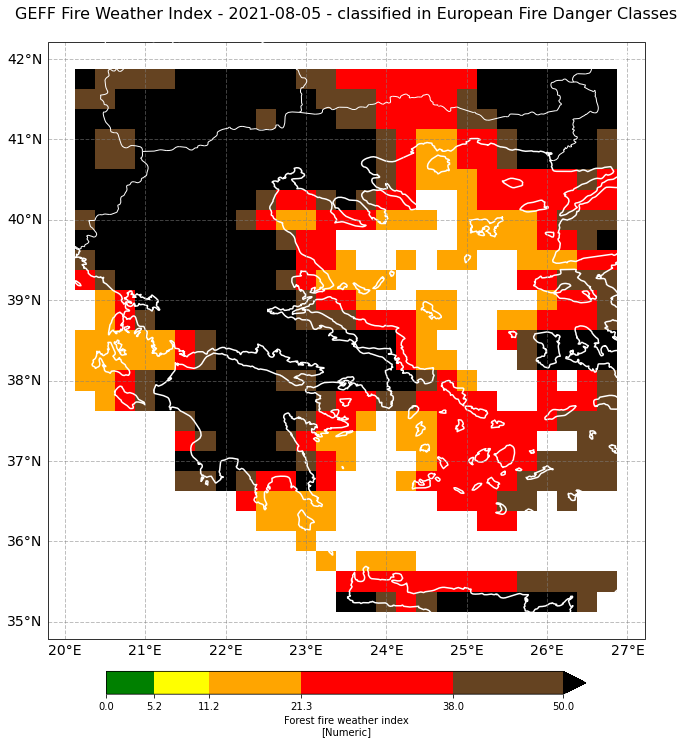

In [3]:
# Initiate a matplotlib figure
fig=plt.figure(figsize=(20,12))
ax=plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# Specify coastlines and borders
ax.coastlines(color='white',linewidth=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=1, zorder=3)

# Specify a grid
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

# Plotting function
fwi_subset.plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
               colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
               label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme'],
                  ax=ax,
               cbar_kwargs={'spacing':'proportional',
                           'ticks':[0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
                            'fraction':0.035,
                            'pad':0.05,
                           'orientation':'horizontal'})

# Set plot title
ax.set_title('GEFF Fire Weather Index - ' + str(fwi_subset.time.data)[2:12] + ' - classified in European Fire Danger Classes\n', size=16)

# Show the plot
plt.show()

# Part B: Atmospheric Impact [Total Cloud Cover]

In [4]:
# Load required libraries
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [5]:
# Load helper functions
%run functions.ipynb

# Load and browse ERA-5 climate reanalysis data
file_cloud_cover = xr.open_dataset('./20210807_era5_tcc.nc')

# Specify one variable of interest (Total Cloud Cover)
cloud_cover = file_cloud_cover['tcc']


(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Total cloud cover at 15:00 UTC'}>)

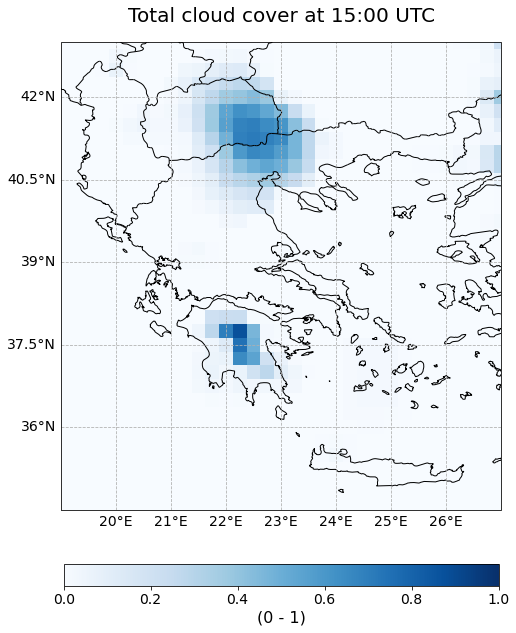

In [6]:
# Visualize the total cloud cover for one time step
hour = 15
visualize_pcolormesh(data_array=cloud_cover.isel(time=hour), 
                     longitude=cloud_cover.longitude, 
                     latitude=cloud_cover.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='Blues', 
                     unit= cloud_cover.units, 
                     long_name= cloud_cover.long_name + ' at ' + str(hour) + ':00 UTC', 
                     vmin=0, 
                     vmax=1, 
                     lonmin=cloud_cover.longitude.min()+44, 
                     lonmax=cloud_cover.longitude.max()-18, 
                     latmin=cloud_cover.latitude.min()+4.5, 
                     latmax=cloud_cover.latitude.max()-27, 
                     set_global=False)